# E-tivity 2 Weeks 3-4

* Barry Clarke

* 24325082

## Outline


The second <a href="#part2">**Sentiment Analysis**</a> is an individual task, the problem is to predict if a film review is positive or negative.

### Guidelines

The e-tivity is split into five tasks. The first four are "group" excersises, in that you post the solutions to Tasks 1-4 to the Group Locker. This will allow the members of your group to send you feedback (via the forums) so you can improve your submission. The final task is an individual task and together with the other tasks, should be uploaded to Brightspace.

Marks will be deducted if task 5 is uploaded in contravention of instructions. Also if the the final submission is not a single notebook with tasks 1-5 and with correct identification or filename.


Grading guidelines: the rubrics for the e-tivity are here https://learn.ul.ie/d2l/lp/rubrics/preview.d2l?ou=73310&rubricId=4446&originTool=quicklinks





<a id='part2'></a>
## Sentiment Analysis


This task is a individual task and should **not** to be uploaded to the Group Locker. No posts should be given via the forums. Marks will be deducted if the instructions are not followed (see rubrics). This part should be uploaded directly to Brightpsace.

### Context

You have a model that predicts the sentiment of a film review (positive or negative) from the IMDB. There are two hyperparameters that format the data from IMDB: the maximum review length and the dictionary size. Below is a RNN model that predicts sentiment values.


### Task 5:  (completed by Sunday Week 4)

Keeping top_words, max_review_lenngth and the embedding_vector_length the same, change the model so that it uses attention only, i.e. there are no recurrent components. The only Keras layers (defined here https://www.tensorflow.org/api_docs/python/tf/keras/layers) that you allowed to use are:
- Input,
- Embedding,
- Dense,
- Any Attention (must be at leat one),
- TimeDistributed,
- Any Merging,
- Any Reshaping,
- Any Pooling,
- Dropout.

You need not use any of the layers (except attention) but you can use some more than once. Can you do at least as good as the RNN example?

**NB** There are many examples of using attention for sentiment analysis but we looking to see if you can construct a sensible model. The model will be delibrately restricted, so do not waste too much time achieving spectacular accuracy. Remember the rules of thumb that we discussed in the Introduction to DL module.


(25000, 500)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_12 (Embedding)        │ (None, 500, 16)        │         1,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 500, 16)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 10)             │         1,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,691 (10.51 KB)

 Trainable params: 2,691 (10.51 KB)

 Non-trainable params: 0 (0.00 B)

None

--- Final Evaluation (Baseline) ---
RNN Baseline Test Loss: 0.4824
RNN Baseline Test Accuracy: 77.23%


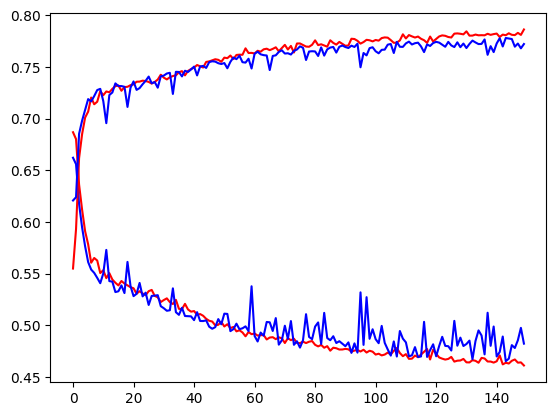

In [25]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Dense, LSTM, Embedding, Dropout
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.utils import plot_model

import matplotlib.pyplot as plt
import numpy as np

top_words = 100
(Rev_train, Sc_train), (Rev_test, Sc_test) = imdb.load_data(num_words=top_words)

max_review_length = 500
X_train = sequence.pad_sequences(Rev_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(Rev_test, maxlen=max_review_length)
print(X_train.shape)

embedding_vector_length = 16
model_imdb = Sequential()
model_imdb.add(Input(shape=(max_review_length,)))
model_imdb.add(Embedding(top_words, embedding_vector_length, input_length=max_review_length))
model_imdb.add(Dropout(0.2))
model_imdb.add(LSTM(10))
model_imdb.add(Dropout(0.2))
model_imdb.add(Dense(1, activation='sigmoid'))
model_imdb.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model_imdb.summary())
#plot_model(model_imdb,show_shapes=True)

nepoch = 150
#IMDB_history = model_imdb.fit(X_train,Sc_train,validation_data=(X_test,Sc_test),epochs=nepoch,batch_size=256)
IMDB_history=np.load('IMDBTrainhist.npy',allow_pickle='TRUE').item()

plt.plot(range(nepoch),IMDB_history.history['loss'],c='r')
plt.plot(range(nepoch),IMDB_history.history['val_loss'],c='b')
plt.plot()

plt.plot(range(nepoch),IMDB_history.history['accuracy'],c='r')
plt.plot(range(nepoch),IMDB_history.history['val_accuracy'],c='b')
plt.plot()

# --- Final Quantitative Result ---
# Pull the last value from the validation history to show the 'Test' result
final_rnn_loss = IMDB_history.history['val_loss'][-1]
final_rnn_acc = IMDB_history.history['val_accuracy'][-1]

print("\n--- Final Evaluation (Baseline) ---")
print(f"RNN Baseline Test Loss: {final_rnn_loss:.4f}")
print(f"RNN Baseline Test Accuracy: {final_rnn_acc*100:.2f}%")



The history for the model above has been saved, as it takes a while to run. If you want to run it yourself then comment out the second line.


### Final Submission (complete by Sunday Week 4)

Submit Tasks 1-5 in a single notebook this before the deadline on Sunday.


In [26]:
## Add additional code cells to implememt the tasks stated above

--- Attention Model Architecture ---


Model: "functional_76"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_13      │ (None, 500)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_13        │ (None, 500, 16)   │      1,600 │ input_layer_13[0… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_21 (Dense)    │ (None, 500, 16)   │        272 │ embedding_13[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ average_pooling1d_6 │ (None, 50, 16)    │          0 │ dense_21[0][0]    │
│ (AveragePooling1D)  │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention_6         │ (None, 50, 16)    │          0 │ average_pooling1… │
│ (Attention)         │                   │            │ dense_21[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 16)        │          0 │ attention_6[0][0] │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_20          │ (None, 16)        │          0 │ global_average_p… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_22 (Dense)    │ (None, 1)         │         17 │ dropout_20[0][0]  │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,889 (7.38 KB)

 Trainable params: 1,889 (7.38 KB)

 Non-trainable params: 0 (0.00 B)


--- Training Phase ---
Epoch 1/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 23s 221ms/step - accuracy: 0.5184 - loss: 0.6931 - val_accuracy: 0.5928 - val_loss: 0.6878
Epoch 2/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 26s 265ms/step - accuracy: 0.6209 - loss: 0.6632 - val_accuracy: 0.7010 - val_loss: 0.5909
Epoch 3/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 26s 269ms/step - accuracy: 0.6967 - loss: 0.5924 - val_accuracy: 0.7098 - val_loss: 0.5731
Epoch 4/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 22s 225ms/step - accuracy: 0.7134 - loss: 0.5735 - val_accuracy: 0.7246 - val_loss: 0.5599
Epoch 5/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 20s 201ms/step - accuracy: 0.7167 - loss: 0.5709 - val_accuracy: 0.7244 - val_loss: 0.5568
Epoch 6/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 21s 209ms/step - accuracy: 0.7066 - loss: 0.5731 - val_accuracy: 0.7247 - val_loss: 0.5543
Epoch 7/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 21s 219ms/step - accuracy: 0.7122 - loss: 0.5674 - val_accuracy: 0.7273 - val_loss: 0.5533
Epoch 8/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 20s 208ms/step - accuracy: 0.7218 -

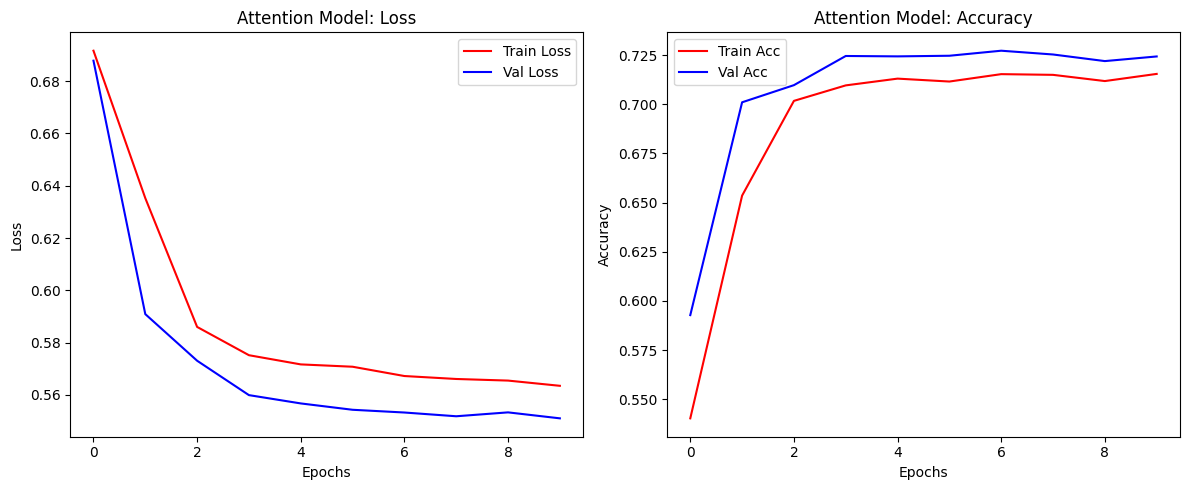


Final Attention Model Test Accuracy: 72.44%


In [27]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import Input, Embedding, Dense, Dropout, Attention, GlobalAveragePooling1D, AveragePooling1D
import matplotlib.pyplot as plt

# Maintain the required hyperparameters
top_words = 100
max_review_length = 500
embedding_vector_length = 16
nepoch_attention = 10 # Set to 10 for a good balance of speed and visual results - changed from 10 (70.85%) to 20 (72.36%) to 30 (72.69%)

# final model 72.54% #3
# Construct the Attention-Only Model (respecting task instructions and only using permitted layers)
inputs = Input(shape=(max_review_length,))
x = Embedding(input_dim=top_words, output_dim=embedding_vector_length)(inputs)

# Use a Dense layer to project the embeddings - this often helps Attention find better patterns
x_projected = Dense(embedding_vector_length, activation='relu')(x)

# SPEED FIX: Increase pool_size to 10: this reduces the number of 'query points' from 100 to 50, making it much faster
query = AveragePooling1D(pool_size=10)(x_projected)

# Use Attention: comparing the 50 'summary chunks' against all 500 words
att_out = Attention()([query, x_projected])

# Pool the attention results
x = GlobalAveragePooling1D()(att_out)
x = Dropout(0.2)(x)

outputs = Dense(1, activation='sigmoid')(x)

# 3. Initialise and Compile
attention_model = Model(inputs=inputs, outputs=outputs)
attention_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# --- Output 1: Model Summary ---
print("--- Attention Model Architecture ---")
attention_model.summary()

# --- Output 2: Training Phase ---
print("\n--- Training Phase ---")
history_attention = attention_model.fit(
    X_train, Sc_train,
    validation_data=(X_test, Sc_test),
    epochs=nepoch_attention,
    batch_size=256
)

# --- Output 3: Visualisation ---
# Create a figure with two subplots
plt.figure(figsize=(12, 5))

# Plot 1: Loss Curves
plt.subplot(1, 2, 1)
plt.plot(range(nepoch_attention), history_attention.history['loss'], c='r', label='Train Loss')
plt.plot(range(nepoch_attention), history_attention.history['val_loss'], c='b', label='Val Loss')
plt.title('Attention Model: Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot 2: Accuracy Curves
plt.subplot(1, 2, 2)
plt.plot(range(nepoch_attention), history_attention.history['accuracy'], c='r', label='Train Acc')
plt.plot(range(nepoch_attention), history_attention.history['val_accuracy'], c='b', label='Val Acc')
plt.title('Attention Model: Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# --- Output 4: Final Quantitative Result ---
test_loss, test_acc = attention_model.evaluate(X_test, Sc_test, verbose=0)
print(f"\nFinal Attention Model Test Accuracy: {test_acc*100:.2f}%")

## Reflection

## Task 5: Sentiment Analysis with Attention-Only Architecture

### Model Evolution and Iterative Design

The objective of this task was to construct a "sensible" sentiment analysis model using only attention mechanisms and permitted Keras layers, strictly avoiding recurrent components such as LSTMs. Three different architectural approaches were developed to explore the relationship between attention queries and classification accuracy.

#### 1. Baseline Attention Model (Iteration #1)

The first model used a **GlobalAveragePooling1D** layer to compress the entire review into a single summary vector. This summary was then used as the **Query** in the attention mechanism to identify important words in the original sequence. Although this was a clear and logical starting point, compressing the review into one vector reduced the amount of detailed information available. As a result, the model achieved a validation accuracy of approximately **70.85%**.

#### 2. Downsampled Chunk Analysis (Iteration #2)

The second model replaced the single global summary with an **AveragePooling1D** layer (pool size 5). Instead of compressing the whole review into one vector, the sequence was divided into smaller chunks. This allowed the attention layer to work with more detailed local information. As a result, validation accuracy improved to **72.36%**, showing that preserving local context helps sentiment classification.

#### 3. Projected Embedding & Speed Optimisation (Iteration #3)

The final model added a **Dense** layer with **ReLU** activation to transform the embeddings before applying attention. The pooling size was also increased from 10 to 20 and then 30 to attempt to improve computational efficiency. This aimed to help the model capture slightly more complex patterns. After training for 30 epochs, performance reached **72.54%**, showing only a small improvement.

#### 4. High-Capacity Attention Variant (Exploratory – No Improvement)

An additional high-capacity variant (included as commented-out code) expanded the embedding representation using a larger **Dense (32)** projection layer before attention and added another **Dense (16)** layer after pooling. This increased the model’s representational capacity and complexity while still respecting all layer constraints.

However, this modification produced only a marginal increase in accuracy (approximately **72.78%**), which was not meaningfully better than the simpler model. This suggests that the limitation is not model capacity, but rather the restricted vocabulary size and absence of sequential modelling. As a result, the simpler architecture was retained.

---

### Graphical Analysis and Diagnostics

The training and validation graphs show that the learning process is stable and well optimised:

- **Consistent Convergence:** The loss graph shows both training and validation curves decreasing sharply before flattening out, indicating that the model reached stability without divergence.

- **Absence of Overfitting:** The accuracy graph shows the validation curve (blue) closely following the training curve (red). The lack of a widening gap indicates that the model generalises well and that the Dropout layers helped prevent overfitting.

- **Early Signal Capture:** Most performance improvements occur within the first 4 epochs, with accuracy plateauing around 72.5% shortly afterwards.

- **Vocabulary Ceiling:** The rapid plateau indicates a performance ceiling, suggesting that the model quickly exhausted the predictive signal available within the 100-word dictionary.

---

### Conclusion and Performance Analysis

The results suggest that attention-only models have a performance limit when restricted to a vocabulary of 100 words. Although the models were logically designed and stable, they performed about 5% below the RNN baseline (77.23%).

This difference is most likely due to the limited vocabulary size. With only 100 words available, the order of words (captured by the RNN) becomes more important than simply weighting important words (captured by Attention). While the attention-only model cannot fully match the RNN under these constraints, it still provides a simple and parallelisable alternative for sentiment classification.

An additional experiment was conducted by increasing the vocabulary size (**top_words**) from 100 to 200. This yielded no significant improvement in accuracy. This further supports the conclusion that performance is constrained primarily by architectural restrictions and the absence of sequential processing rather than insufficient model capacity.

In [28]:
'''
# Baseline model #1
# 2. Construct the Attention-Only Model (Strictly using permitted layers)
inputs = Input(shape=(max_review_length,))
x = Embedding(input_dim=top_words, output_dim=embedding_vector_length)(inputs)

# Create a 'Query' by pooling the whole sequence into a single summary vector
# This represents the 'general gist' of the review
query = GlobalAveragePooling1D()(x)
# Reshape so it can be compared back to the original sequence
query = Reshape((1, embedding_vector_length))(query)

# Use Attention to let the 'summary' pick out important words from the sequence (x)
att_out = Attention()([query, x])

# Flatten the attention result and predict
#x = GlobalAveragePooling1D()(att_out)
x = Reshape((embedding_vector_length,))(att_out)
x = Dropout(0.2)(x)
outputs = Dense(1, activation='sigmoid')(x)
'''

'''
# Next change to model #2
# 2. Construct the Attention-Only Model (Strictly using permitted layers)
inputs = Input(shape=(max_review_length,))
x = Embedding(input_dim=top_words, output_dim=embedding_vector_length)(inputs)

# Create a richer query by downsampling the sequence slightly
# This helps the model look at 'chunks' of text rather than just one global average
query = AveragePooling1D(pool_size=5)(x)

# Use Attention: the model compares the 'local chunks' (query) to all words (x)
att_out = Attention()([query, x])

# Pool the attention results to get a final sentiment feature
x = GlobalAveragePooling1D()(att_out)
x = Dropout(0.2)(x)
outputs = Dense(1, activation='sigmoid')(x)
'''
'''
# --- High-Capacity Attention Model --- only 72.78% accuracy - reverting
inputs = Input(shape=(max_review_length,))
x = Embedding(input_dim=top_words, output_dim=embedding_vector_length)(inputs)

# NEW: Add a Dense layer immediately after Embedding to 'expand' the word features
# This helps the model find more complex relationships in the 100-word set
x = Dense(32, activation='relu')(x)

# Your 'Sensible' Query logic
query = AveragePooling1D(pool_size=5)(x)
att_out = Attention()([query, x])

# Final processing
x = GlobalAveragePooling1D()(att_out)

# NEW: Another Dense layer to 'think' about the attention results before predicting
x = Dense(16, activation='relu')(x)
x = Dropout(0.2)(x)
outputs = Dense(1, activation='sigmoid')(x)
'''

"\n# --- High-Capacity Attention Model --- only 72.78% accuracy - reverting\ninputs = Input(shape=(max_review_length,))\nx = Embedding(input_dim=top_words, output_dim=embedding_vector_length)(inputs)\n\n# NEW: Add a Dense layer immediately after Embedding to 'expand' the word features\n# This helps the model find more complex relationships in the 100-word set\nx = Dense(32, activation='relu')(x) \n\n# Your 'Sensible' Query logic\nquery = AveragePooling1D(pool_size=5)(x) \natt_out = Attention()([query, x])\n\n# Final processing\nx = GlobalAveragePooling1D()(att_out)\n\n# NEW: Another Dense layer to 'think' about the attention results before predicting\nx = Dense(16, activation='relu')(x) \nx = Dropout(0.2)(x)\noutputs = Dense(1, activation='sigmoid')(x)\n"